 Import Library

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import os


Baca Dataset

In [7]:
# Membaca file CSV dengan delimiter titik koma
df = pd.read_csv("C:/Users/USER1/Downloads/Advertising Spend vs Sales/Advertising.csv", sep=";")

# Hapus kolom kosong yang tidak diperlukan
df = df.dropna(axis=1, how='all')

# Tampilkan 5 data pertama
print("Contoh data:")
df.head()


Contoh data:


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Cek Nama Kolom (opsional untuk debug)

In [8]:
print("Kolom dalam dataset:")
print(df.columns)


Kolom dalam dataset:
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


Pilih Fitur (X) dan Target (Y)

In [9]:
# Pastikan gunakan nama kolom dengan huruf kecil (sesuai file)
X = df[['TV', 'radio', 'newspaper']]
Y = df[['sales']]


 Bagi Data ke Training dan Testing

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Buat dan Latih Model Regresi Linear

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

Prediksi dan Evaluasi Model

In [12]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")


Mean Squared Error (MSE): 3.17
R-squared Score (R²): 0.90


Visualisasi: Actual vs Predicted

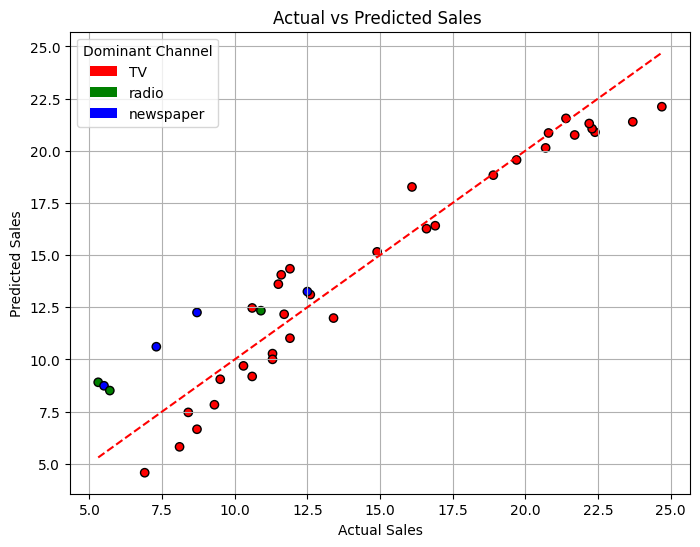

In [16]:
import numpy as np

# Bikin kolom kategori dari X_test
dominant_channel = X_test[['TV', 'radio', 'newspaper']].idxmax(axis=1)

# Mapping warna per channel
color_map = {'TV': 'red', 'radio': 'green', 'newspaper': 'blue'}
colors = dominant_channel.map(color_map)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, c=colors, edgecolors='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales ")
plt.grid(True)

# Custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=label) for label, color in color_map.items()]
plt.legend(handles=legend_elements, title='Dominant Channel')

plt.show()


📈 Hasil Utama:
Dataset yang digunakan berisi 200 observasi.
Model dilatih menggunakan 80% data, dan diuji dengan 20% sisanya.
Evaluasi model menunjukkan performa yang sangat baik:
🔹 Mean Squared Error (MSE): 3.17
→ Kesalahan rata-rata prediksi relatif kecil.
🔹 R-squared (R²): 0.90
→ Artinya, 90% variasi penjualan dapat dijelaskan oleh kombinasi variabel TV, radio, dan koran.


📊 Kesimpulan Visual Awal:
=> TV (warna merah):
Paling banyak jumlahnya di plot → artinya dalam sebagian besar kasus, budget TV adalah yang paling besar di antara ketiganya.
Banyak titik merah berada dekat dengan garis ideal (dashed red line), artinya prediksi model paling akurat saat TV jadi channel dominan.

=> Radio (warna hijau):
Jumlahnya sedikit, tapi beberapa titik cukup dekat ke garis ideal juga.
Bisa dibilang performa model saat Radio dominan cukup bagus, meskipun datanya lebih sedikit.

=> Newspaper (warna biru):
Titiknya paling jarang dan menyebar agak jauh dari garis ideal.
Menunjukkan bahwa ketika Newspaper dominan, prediksi penjualan cenderung kurang akurat.
Bisa juga diartikan bahwa Newspaper bukan channel yang paling efektif dalam menjelaskan penjualan menurut model ini.


✅ Kesimpulan Utama:
TV adalah media iklan yang paling efektif berdasarkan data ini, baik dari segi dominasi di dataset maupun kontribusinya terhadap akurasi prediksi model.
Newspaper tampaknya yang paling tidak konsisten, dan mungkin kurang efektif sebagai variabel prediktor utama untuk penjualan.

